# 1. Choose a binary classification dataset.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve

In [7]:
df = pd.read_csv("heart.csv")
print(df.head())
print(df.info())
print(df['target'].value_counts()) 

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

# 2. Train/test split and standardize features

In [8]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Fit a Logistic Regression model.

In [10]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

# 4. Evaluate with confusion matrix, precision, recall, ROC-AUC.

Confusion Matrix:
 [[73 29]
 [13 90]]
Precision: 0.7563025210084033
Recall: 0.8737864077669902
ROC-AUC Score: 0.8787359604035789


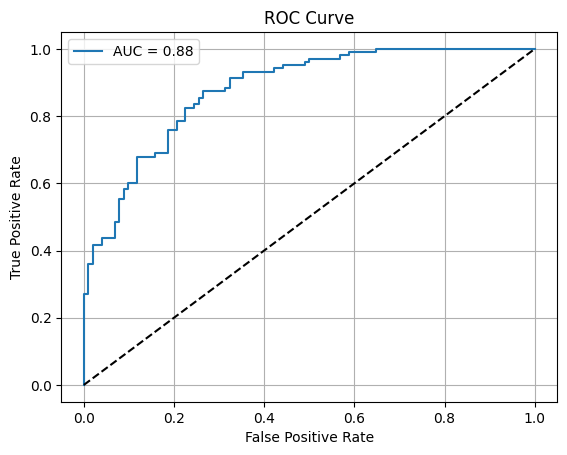

In [12]:
y_probs = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs))
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# 5. Tune threshold and explain sigmoid function.

In [13]:
threshold = 0.4
y_custom = (y_probs >= threshold).astype(int)
print("Custom Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_custom))
print("Custom Precision:", precision_score(y_test, y_custom))
print("Custom Recall:", recall_score(y_test, y_custom))

Custom Threshold Confusion Matrix:
 [[69 33]
 [ 9 94]]
Custom Precision: 0.7401574803149606
Custom Recall: 0.912621359223301


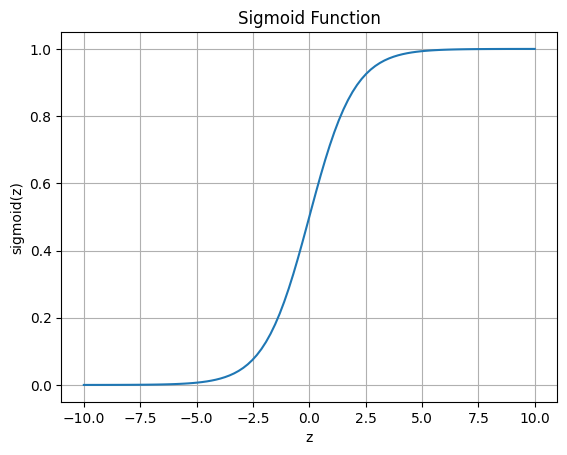

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)
plt.plot(z, sig)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()